In [2]:
pip install imbalanced-learn

In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv("/content/fertilizer-class.csv")

In [5]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [6]:
df.head()


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [7]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,30.204878,58.990244,43.590244,18.814634,3.219512,18.634146
std,3.592882,5.973791,11.236665,11.273115,5.571778,13.494654
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,27.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,42.000000,14.000000,0.000000,18.000000
75%,33.000000,64.000000,51.000000,24.000000,7.000000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [8]:
df.shape

(205, 9)

In [9]:
df["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

<Axes: xlabel='Soil Type', ylabel='count'>

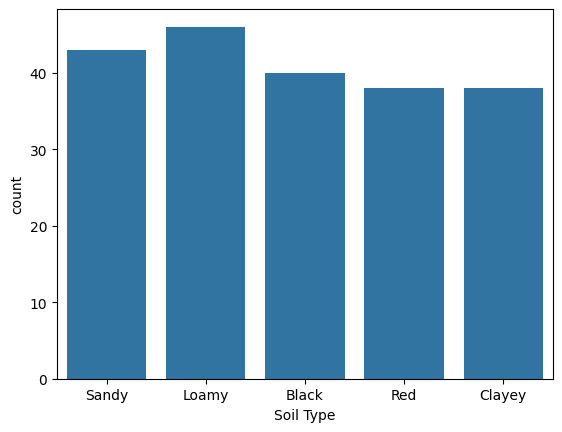

In [10]:
import seaborn as sns
sns.countplot(x='Soil Type',data=df)

<Axes: xlabel='Crop Type', ylabel='count'>

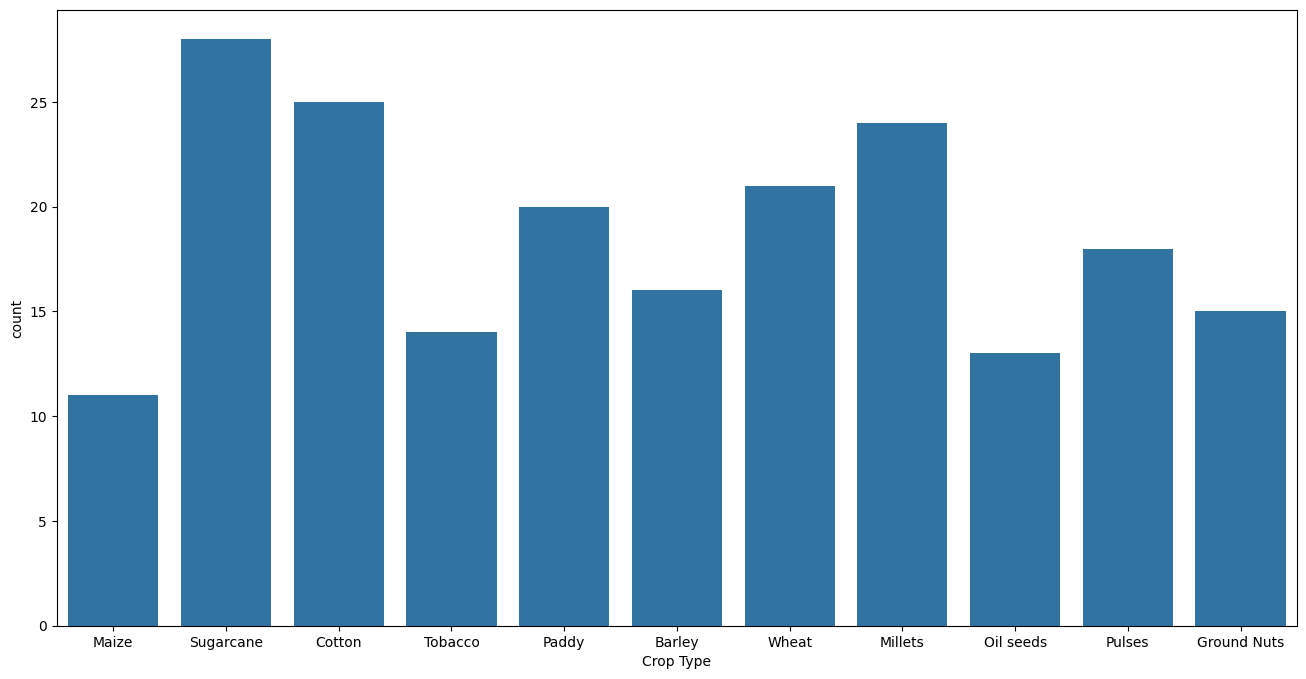

In [11]:
plt.figure(figsize=(16,8))
sns.countplot(x='Crop Type',data=df)

<Axes: xlabel='Fertilizer Name', ylabel='count'>

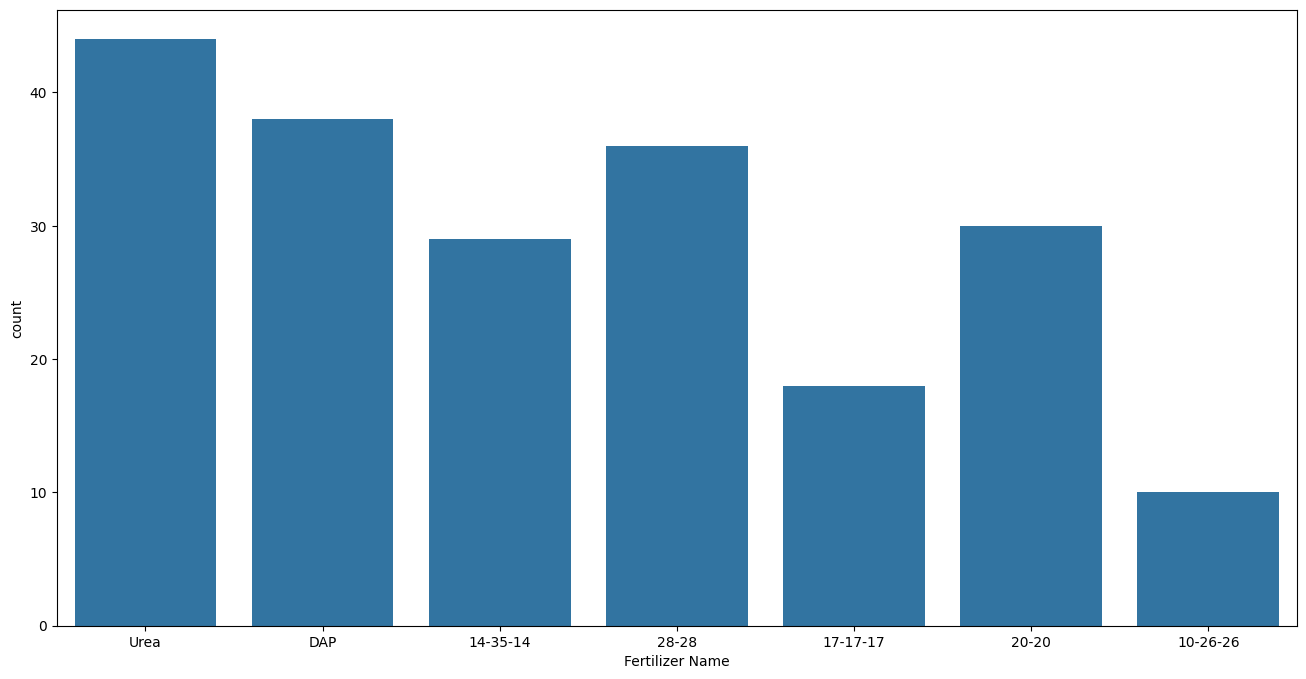

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Name',data=df)

In [13]:
def plot_confi(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df['Fertilizer Name'])

def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer Name'], ax=axes[1])

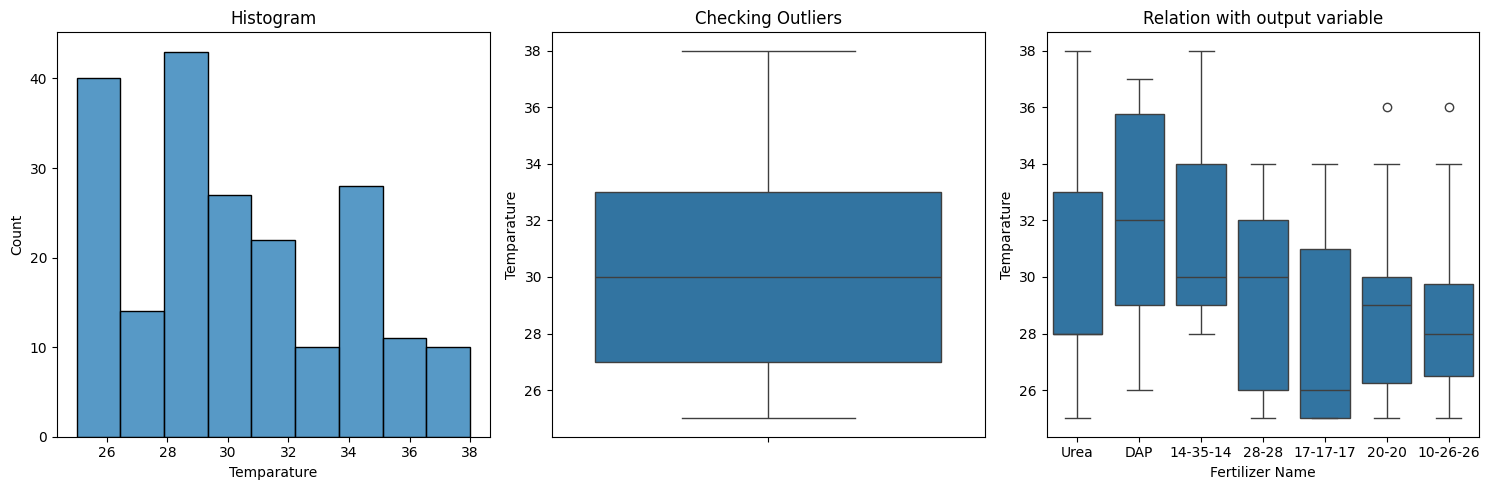

In [14]:
plot_confi(df['Temparature'])

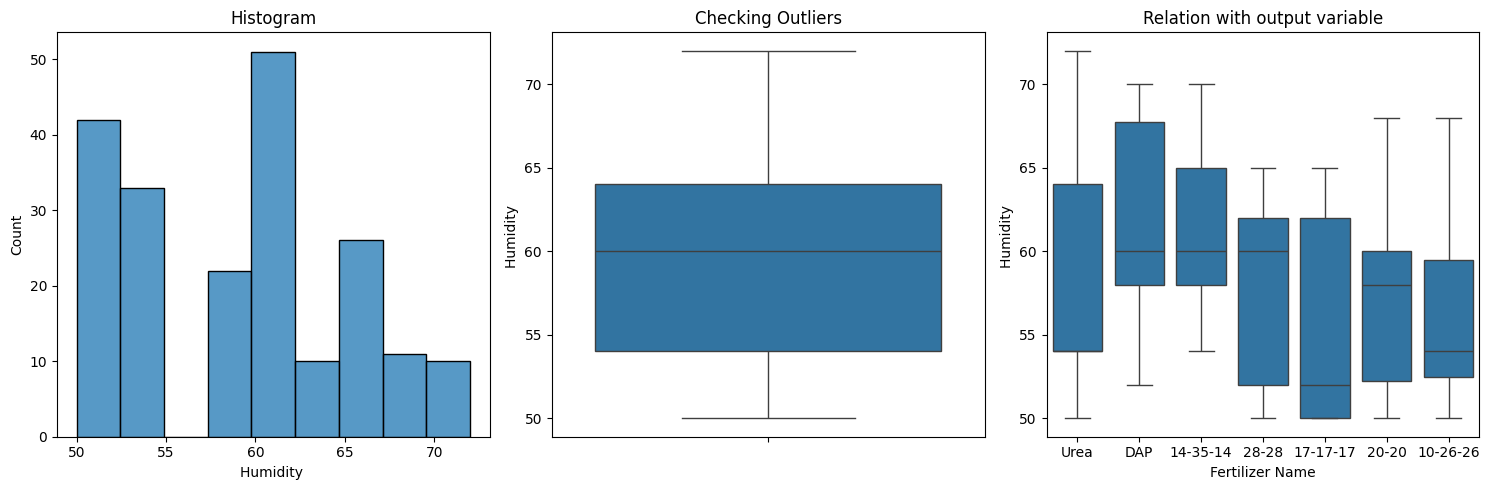

In [15]:

plot_confi(df['Humidity '])

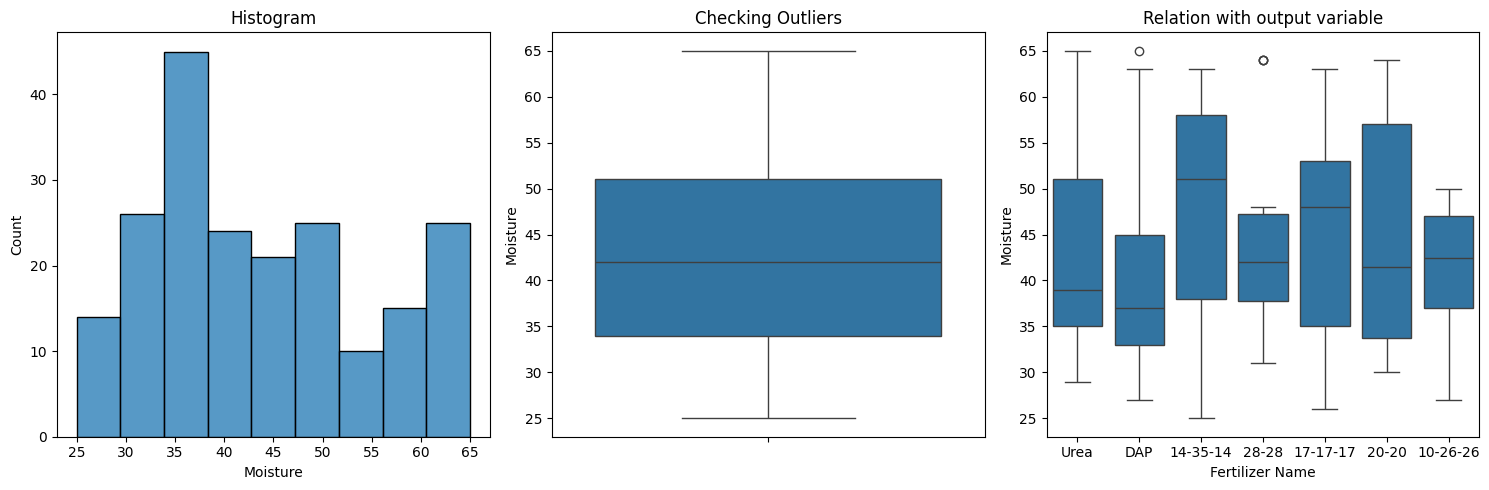

In [16]:

plot_confi(df['Moisture'])

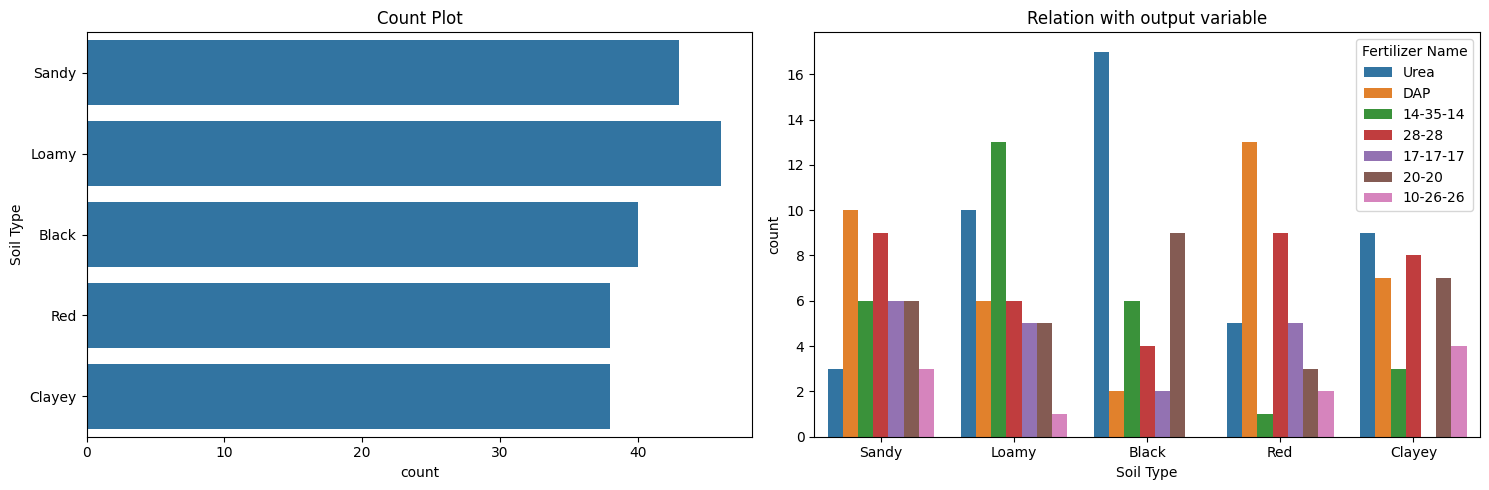

In [17]:
plot_cato(df['Soil Type'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

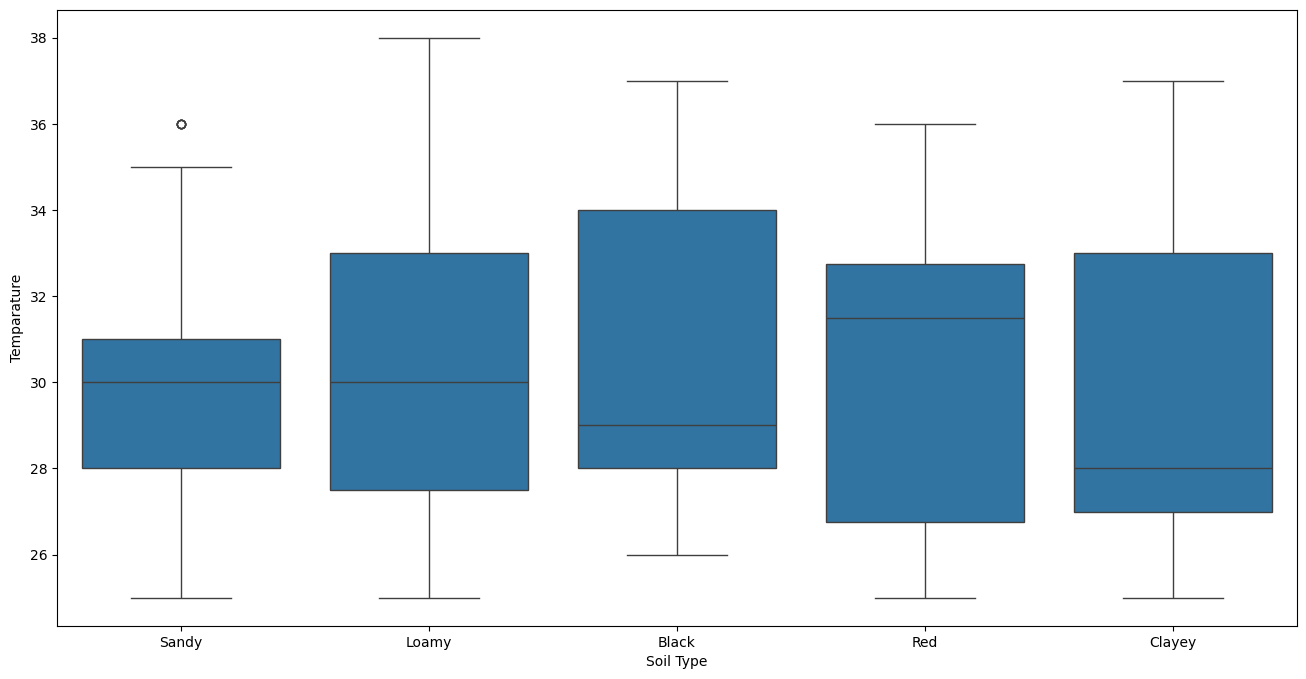

In [18]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'])

In [19]:

from sklearn.preprocessing import LabelEncoder
#encoding Soil Type variable
encode_soil = LabelEncoder()
df['Soil Type'] = encode_soil.fit_transform(df['Soil Type'])

Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type


,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [20]:


encode_crop =  LabelEncoder()
df['Crop Type'] = encode_crop.fit_transform(df['Crop Type'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type


,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [21]:
encode_ferti = LabelEncoder()
df['Fertilizer Name'] = encode_ferti.fit_transform(df['Fertilizer Name'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer


,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [22]:
y=df['Fertilizer Name'].copy()
X=df.drop('Fertilizer Name',axis=1).copy()


In [23]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
X=Scaler.fit_transform(X)

In [24]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X,y=sm.fit_resample(X,y.ravel())

<ipython-input-24-84a19ead7057>:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X,y=sm.fit_resample(X,y.ravel())


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8,shuffle=False,random_state=42)

In [26]:
from sklearn.model_selection import KFold
k_folds=5
kf = KFold(n_splits=k_folds, shuffle=False)


In [27]:
for train_index, test_index in kf.split(X):
  X_train_fold, X_test_fold = X[train_index], X[test_index]
  y_train_fold, y_test_fold = y[train_index], y[test_index]


In [28]:
X

array([[0.07692308, 0.09090909, 0.325     , ..., 0.86842105, 0.        ,
        0.        ],
       [0.30769231, 0.09090909, 0.5       , ..., 0.21052632, 0.        ,
        0.85714286],
       [0.69230769, 0.68181818, 0.925     , ..., 0.07894737, 0.47368421,
        0.71428571],
       ...,
       [0.86450323, 0.87447918, 0.2619271 , ..., 0.20050713, 0.        ,
        0.93993057],
       [0.37684339, 0.41811903, 0.225     , ..., 0.28947368, 0.        ,
        0.88095238],
       [0.30769231, 0.36363636, 0.97331727, ..., 0.24209258, 0.        ,
        0.85239242]])

In [29]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)


In [30]:
X_train.shape

(246, 8)

In [31]:
X_train[0].shape

(8,)

In [ ]:
tf.random.set_seed(42)

model1=tf.keras.Sequential([
    tf.keras.layers.Dense(3,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')
])

In [ ]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(0.01),metrics=['accuracy'])


find_lr_history=model1.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

In [ ]:
model1.evaluate(X_test,y_test)

In [ ]:
newmodel = tf.keras.models.load_model('theonewthekfold (3).h5')


In [ ]:
newmodel.evaluate(X_test,y_test)

In [ ]:
y_pred = newmodel.predict(X_test)

In [ ]:
plt.plot(y_test, X_test)

plt.xlabel("Input attributes")
plt.ylabel("Fertilizer")
plt.title("Fertilizer Classification")

In [ ]:
pip install pipreqs


In [ ]:
pip freeze


In [1]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [32]:
!git config --global user.email "meghxmohan@gmail.com"
!git config --global user.name "meghaaaav"
